# TO DO
TRain, valid test split

SVM

remove HEDIS attributes

SMOTE analysis for class imbalance

In [70]:
import pandas as pd
import pickle

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [71]:
df_test= pd.read_csv('2020_Competition_Holdout .csv')
df_betos_test = pd.read_pickle('df_betos_test_suraj.pkl')
df_mcc_test = pd.read_pickle('df_MCC_test_aditya.pkl')
df_rx_neti_test = pd.read_pickle('df_rx_test_neti.pkl')
df_demographics_test = pd.read_pickle('df_demographics_suraj_test.pkl')
df_rev_test = pd.read_pickle('df_rev_suraj_test.pkl')
df_cms_test = pd.read_pickle('df_suraj_test_cms.pkl')

In [72]:
df= pd.read_csv('2020_Competition_Training (1).csv')
df_y = df[['person_id_syn', 'transportation_issues']]
df_betos = pd.read_pickle('df_betos_suraj.pkl')
df_mcc = pd.read_pickle('df_MCC_aditya.pkl')
df_rx_neti = pd.read_pickle('df_rx_neti.pkl')
df_demographics = pd.read_pickle('df_demographics_suraj.pkl')
df_rev = pd.read_pickle('df_rev_suraj.pkl')
df_cms = pd.read_pickle('df_suraj_cms.pkl')

In [73]:
df.shape

(69572, 826)

# Few Hedis COlumns contain NA values

In [74]:
df_rx_neti.shape

(69572, 15)

In [75]:
df_rx_neti_test.shape

(17681, 15)

In [76]:
df_betos_mcc = pd.merge(df_betos, df_mcc, left_on='person_id_syn_betos', right_on='person_id_syn_MCC', how='left')
df_betos_mcc = df_betos_mcc.drop('person_id_syn_MCC',axis=1)

df_betos_mcc_y = pd.merge(df_betos_mcc, df_y, left_on='person_id_syn_betos', right_on='person_id_syn', how='left')
# df_betos_mcc_y? = df_betos_mcc.join(df_y, lsuffix='person_id_syn_betos', rsuffix='person_id_syn')
df_betos_mcc_y = df_betos_mcc_y.drop('person_id_syn',axis=1)

df_betos_mcc_rx_y = pd.merge(df_betos_mcc_y, df_rx_neti, left_on='person_id_syn_betos', right_on='person_id_syn_RX', how='left')
# df_betos_mcc_rx_y = df_betos_mcc_y.join(df_rx_neti, lsuffix='person_id_syn_betos', rsuffix= 'person_id_syn_RX')
df_betos_mcc_rx_y = df_betos_mcc_rx_y.drop('person_id_syn_RX',axis=1)

df_betos_mcc_rx_demo_y = pd.merge(df_betos_mcc_rx_y, df_demographics, left_on='person_id_syn_betos', right_on='person_id_syn_demo', how='left')
# df_betos_mcc_rx_demo_y = df_betos_mcc_rx_y.join(df_demographics, lsuffix='person_id_syn_betos', rsuffix='person_id_syn')
df_betos_mcc_rx_demo_y = df_betos_mcc_rx_demo_y.drop('person_id_syn_demo',axis=1)

df_betos_mcc_rx_demo_rev_y = pd.merge(df_betos_mcc_rx_demo_y, df_rev, left_on='person_id_syn_betos', right_on='person_id_syn_rev', how='left')
# df_betos_mcc_rx_demo_rev_y = df_betos_mcc_rx_demo_y.join(df_rev, lsuffix='person_id_syn_betos', rsuffix='person_id_syn_rev')
df_betos_mcc_rx_demo_rev_y = df_betos_mcc_rx_demo_rev_y.drop('person_id_syn_rev',axis=1)

df_betos_mcc_rx_demo_rev_cms_y = pd.merge(df_betos_mcc_rx_demo_rev_y, df_cms, left_on='person_id_syn_betos', right_on='person_id_syn_cms', how='left')
df_betos_mcc_rx_demo_rev_cms_y = df_betos_mcc_rx_demo_rev_cms_y.drop('person_id_syn_cms',axis=1)

df_betos_mcc_rx_demo_rev_cms_y.dropna(inplace=True)


In [77]:
df_betos_mcc_rx_demo_rev_cms_y.shape

(66944, 140)

In [78]:
list(df_betos_mcc_rx_demo_rev_cms_y.columns)

['betos_o1a_ind_betos',
 'betos_m5b_ind_betos',
 'betos_m5d_ind_betos',
 'betos_t1a_ind_betos',
 'betos_o1a_pmpm_ct_betos',
 'betos_d1d_ind_betos',
 'EXC_ind_sum_betos',
 'betos_o1b_ind_betos',
 'betos_m1b_ind_betos',
 'DUR_ind_sum_betos',
 'EVAL_ind_sum_betos',
 'betos_m5b_pmpm_ct_betos',
 'yes_no_sum_betos',
 'person_id_syn_betos',
 'MEN_ind_sum_MCC',
 'MEN_pmpm_sum_MCC',
 'submcc_res_copd_ind_MCC',
 'submcc_men_depr_pmpm_ct_MCC',
 'submcc_ben_othr_ind_MCC',
 'CAN_ind_sum_MCC',
 'submcc_sns_othr_ind_MCC',
 'cci_score_MCC',
 'submcc_men_depr_ind_MCC',
 'submcc_can_othr_ind_MCC',
 'submcc_res_copd_pmpm_ct_MCC',
 'submcc_can_h/o_ind_MCC',
 'submcc_men_abus_ind_MCC',
 'submcc_cir_art_ind_MCC',
 'SNS_pmpm_sum_MCC',
 'submcc_vco_vac_ind_MCC',
 'submcc_sns_othr_pmpm_ct_MCC',
 'VCO_ind_sum_MCC',
 'CAN_pmpm_sum_MCC',
 'submcc_mus_form_ind_MCC',
 'fci_score_MCC',
 'submcc_dia_neu_pmpm_ct_MCC',
 'SOR_ind_sum_MCC',
 'submcc_sor_eye_ind_MCC',
 'GUS_pmpm_sum_MCC',
 'submcc_rsk_obe_pmpm_ct_MCC',
 '

In [79]:
def undersampling_fn(X_train, X_valid, Y_train, Y_valid):
    X_train['transportation_issues'] = Y_train
    X_valid['transportation_issues'] = Y_valid
    
    df_train_no_issue = X_train[X_train.transportation_issues == 0]
    df_train_no_issue = df_train_no_issue.dropna()
    df_train_issue = X_train[X_train.transportation_issues == 1]
    df_train_issue = df_train_issue.dropna()
    print("issue datas shape",df_train_issue.shape)
    df_train_no_issues_sample = df_train_no_issue.sample(n=7138)
#     df_no_issues_sample = df_no_issue
    df_train_model_sample = pd.concat([df_train_no_issues_sample, df_train_issue])
    
    df_valid_no_issue = X_valid[X_valid.transportation_issues == 0]
    df_valid_no_issue = df_valid_no_issue.dropna()
    df_valid_issue = X_valid[X_valid.transportation_issues == 1]
    df_valid_issue = df_valid_issue.dropna()
    print("issue datas shape",df_valid_issue.shape)
    df_valid_no_issues_sample = df_valid_no_issue.sample(n=1530)
#     df_no_issues_sample = df_no_issue
    df_valid_model_sample = pd.concat([df_valid_no_issues_sample, df_valid_issue])
    
    y_train = df_train_model_sample['transportation_issues']
    X_train = df_train_model_sample.drop(columns=['transportation_issues'])
    X_train.reset_index(inplace=True,drop=True)
    y_train.reset_index(inplace=True,drop=True)

    y_valid = df_valid_model_sample['transportation_issues'] 
    X_valid = df_valid_model_sample.drop(columns=['transportation_issues'])
    X_valid.reset_index(inplace=True,drop=True)
    y_valid.reset_index(inplace=True,drop=True)

    
    return X_train,X_valid,y_train,y_valid

In [80]:
from sklearn.utils import resample
def oversampling_fn(X_train, X_valid, Y_train, Y_valid):
    X_train['transportation_issues'] = Y_train
    X_valid['transportation_issues'] = Y_valid

    
    df_train_minority = X_train[X_train.transportation_issues == 1]
    df_train_minority_upsampled_issue = resample(df_train_minority,
                                           replace=True,     # sample with replacement
                                           n_samples=39722,    # to match majority class
                                           random_state=123) # repr)
    df_train_majority = X_train[X_train.transportation_issues == 0]
    df_train_balanced = df_train_majority.append(df_train_minority_upsampled_issue)
    
    y_train = df_train_balanced['transportation_issues']
    X_train = df_train_balanced.drop(columns=['transportation_issues'])
    X_train.reset_index(inplace=True,drop=True)
    y_train.reset_index(inplace=True,drop=True)
    
    df_valid_minority = X_valid[X_valid.transportation_issues == 1]
    df_valid_minority_upsampled_issue = resample(df_valid_minority,
                                           replace=True,     # sample with replacement
                                           n_samples=8512,    # to match majority class
                                           random_state=123) # repr)
    df_valid_majority = X_valid[X_valid.transportation_issues == 0]
    df_valid_balanced = df_valid_majority.append(df_valid_minority_upsampled_issue)
    

    y_valid = df_valid_balanced['transportation_issues'] 
    X_valid = df_valid_balanced.drop(columns=['transportation_issues'])
    X_valid.reset_index(inplace=True,drop=True)
    y_valid.reset_index(inplace=True,drop=True)

    return X_train,X_valid,y_train,y_valid
    

In [81]:
def smote_fn(X,y):
    from imblearn.over_sampling import SMOTE

    # Oversample with SMOTE and random undersample for imbalanced dataset
    from collections import Counter
    from sklearn.datasets import make_classification
    from imblearn.over_sampling import SMOTE
    from imblearn.under_sampling import RandomUnderSampler
    from imblearn.pipeline import Pipeline
    from matplotlib import pyplot
    from numpy import where

    # summarize class distribution
    counter = Counter(y)
    print(counter)
    # define pipeline
    over = SMOTE(sampling_strategy=0.6, random_state=66)
    under = RandomUnderSampler(sampling_strategy=0.7, random_state=77)
    steps = [('o', over), ('u', under)]
    pipeline = Pipeline(steps=steps)
    # transform the dataset
    X, y = pipeline.fit_resample(X, y)
    # summarize the new class distribution
    counter = Counter(y)
    print(counter)
    return X, y

In [82]:
import pandas as pd
from sklearn.model_selection import train_test_split

def split_stratified_into_train_val_test(df_input, stratify_colname='y',
                                         frac_train=0.7, frac_val=0.15, frac_test=0.15,
                                         random_state=55):

    if frac_train + frac_val + frac_test != 1.0:
        raise ValueError('fractions %f, %f, %f do not add up to 1.0' % \
                         (frac_train, frac_val, frac_test))

    if stratify_colname not in df_input.columns:
        raise ValueError('%s is not a column in the dataframe' % (stratify_colname))

    X = df_input # Contains all columns.
    y = df_input[[stratify_colname]] # Dataframe of just the column on which to stratify.

    # Split original dataframe into train and temp dataframes.
    df_train, df_temp, y_train, y_temp = train_test_split(X,
                                                          y,
                                                          stratify=y,
                                                          test_size=(1.0 - frac_train),
                                                          random_state=random_state)

    # Split the temp dataframe into val and test dataframes.
    relative_frac_test = frac_test / (frac_val + frac_test)
    df_val, df_test, y_val, y_test = train_test_split(df_temp,
                                                      y_temp,
                                                      stratify=y_temp,
                                                      test_size=relative_frac_test,
                                                      random_state=random_state)

    assert len(df_input) == len(df_train) + len(df_val) + len(df_test)

    return df_train, df_val, df_test

In [83]:
class MultiColumnLabelEncoder:
    from sklearn.preprocessing import LabelEncoder
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        from sklearn.preprocessing import LabelEncoder
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        from sklearn.preprocessing import LabelEncoder
        return self.fit(X,y).transform(X)

In [84]:
# encoding_pipeline = Pipeline([
#     ('encoding',MultiColumnLabelEncoder(columns=['fruit','color']))
#     # add more pipeline steps as needed
# ])
# encoding_pipeline.fit_transform(fruit_data)

In [85]:
def label_encoder_fn(X_train, X_valid, X_test, numerical_columns, categorical_columns):
    from sklearn.preprocessing import LabelEncoder
    labelencoder = LabelEncoder()
#     from collections import defaultdict
#     d = defaultdict(LabelEncoder)
#     from collections import defaultdict
#     d = defaultdict(LabelEncoder)
#     X_train_cat = X_train[categorical_columns].apply(lambda x: d[x.name].fit_transform(x))
    X_train_cat = MultiColumnLabelEncoder().fit_transform(X_train[categorical_columns])
    X_train_num = X_train[numerical_columns]
    X_train_encoded = pd.concat([X_train_num,X_train_cat],axis=1)
    
    
#     X_valid_cat = X_valid[categorical_columns].apply(lambda x: d[x.name].transform(x))
    X_valid_cat = MultiColumnLabelEncoder().transform(X_valid[categorical_columns])
    X_valid_num = X_valid[numerical_columns]
    X_valid_encoded = pd.concat([X_valid_num,X_valid_cat],axis=1)
    
    X_test_cat = MultiColumnLabelEncoder().transform(X_test[categorical_columns])
#     X_test_cat = X_test[categorical_columns].apply(lambda x: d[x.name].transform(x))
    X_test_num = X_test[numerical_columns]
    X_test_encoded = pd.concat([X_test_num,X_test_cat],axis=1)
    
    print(MultiColumnLabelEncoder())
    
    return MultiColumnLabelEncoder(), X_train_encoded, X_valid_encoded, X_test_encoded

In [86]:
def min_max_fn(X_train, X_valid, X_test, numerical_columns, categorical_columns):
    from sklearn import preprocessing

    X_train_num = X_train[numerical_columns].values #returns a numpy array
    min_max_scaler = preprocessing.MinMaxScaler()
    X_scaled_train = min_max_scaler.fit_transform(X_train_num)
    X_train_num_min_max = pd.DataFrame(X_scaled_train,columns=X_train[numerical_columns].columns)
    X_train_final = pd.concat([X_train_num_min_max,X_train[categorical_columns]],axis=1)
    # X_train = X_train[top_featured_columns]

    
    x_valid_num = X_valid[numerical_columns].values
    x_scaled_valid = min_max_scaler.transform(x_valid_num)
    X_valid_num_mix_max = pd.DataFrame(x_scaled_valid,columns=X_valid[numerical_columns].columns)
    X_valid = pd.concat([X_valid_num_mix_max,X_valid[categorical_columns]],axis=1)
    # X_valid = X_valid[top_featured_columns]
    
    x_test_num = X_test[numerical_columns].values
    x_scaled_test = min_max_scaler.transform(x_test_num)
    X_test_num_mix_max = pd.DataFrame(x_scaled_test,columns=X_test[numerical_columns].columns)
    X_test = pd.concat([X_test_num_mix_max,X_test[categorical_columns]],axis=1)
    # X_test = X_test[top_featured_columns]
    
    
    return min_max_scaler, X_train, X_valid, X_test

    

In [87]:
def Balanced_bagging(X_train, X_test,y_train, y_test):
    from imblearn.ensemble import BalancedBaggingClassifier
    from sklearn.tree import DecisionTreeClassifier
    #Create an object of the classifier.
    bbc = BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                    sampling_strategy='auto',
                                    replacement=True,
                                    random_state=0)


    #Train the classifier.
    bbc.fit(X_train, y_train)
    y_pred_train = bbc.predict(X_train)
    y_pred_test = bbc.predict(X_test)
    
    return bbc, y_pred_train, y_pred_test

In [88]:
def logistic(X_train, X_test,y_train, y_test):
    logistic_regression= LogisticRegression()
    logistic_regression.fit(X_train,y_train)
    return logistic_regression
    

In [89]:
def random_forest_fn(X_train, X_test,y_train, y_test):

    from sklearn.ensemble import RandomForestClassifier
    from sklearn.metrics import classification_report
    from sklearn.metrics import confusion_matrix
    RF_clf = RandomForestClassifier(n_estimators=250,max_depth=4)
    RF_clf.fit(X_train, y_train)
    return RF_clf

In [90]:
def cross_valid_fn(model,X,y):

    from sklearn.model_selection import cross_val_score #importing cross validation package
    # 10-fold cross-validation on logistic regression
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy') #fitting logistic regression to whole data with 10 fold
    print(scores)
    return scores

In [91]:
def svm_fn(X_train, X_test,y_train, y_test):
    from sklearn.svm import SVC
    svclassifier = SVC(kernel='linear')
    svclassifier.fit(X_train, y_train)
    return RF_clf

In [92]:
def xgboost_fn(X_train, X_test, y_train, y_test):
    from sklearn import metrics
    import matplotlib.pyplot as plt
    # Hyperparameter tuning grid

# Hyperparameter tuning grid
#     params = {
#             'min_child_weight': [1, 5, 10],
#             'gamma': [0.5, 1, 1.5, 2, 5],
#             'subsample': [0.6, 0.8, 1.0],
#             'colsample_bytree': [0.6, 0.8, 1.0],
#             'max_depth': [3, 4, 5]
#             }

    params = {'min_child_weight': [5],
        'gamma': [1.5],
        'subsample': [0.8],
        'colsample_bytree': [0.8],
        'max_depth': [4]}
    
    from sklearn.model_selection import GridSearchCV
    from xgboost.sklearn import XGBClassifier
    # Initialize XGBoost model, use growth tree algorithm similar to lightgbm
    bst = XGBClassifier(n_jobs=-1,grow_policy='lossguide',tree_method ='hist',n_estimators=100)
    # Gridsearch on parameter grid, use AUC to determine the best model
    cv = GridSearchCV(bst,params,'roc_auc',-1, verbose=10)
    # Fit model on the training data, track logloss on training and testing set
    cv.fit(X_train, y_train,eval_metric='logloss',eval_set=[(X_train,y_train),(X_test,y_test)],verbose=False)

    import joblib

    # Print out the best parameters
    print(cv.best_params_)

    #save model
    joblib.dump(cv.best_estimator_, 'xgb.model')


    #load saved model
    xgb = joblib.load('xgb.model')


    # retrieve performance metrics
    results = xgb.evals_result()
    epochs = len(results['validation_0']['logloss'])
    x_axis = range(0, epochs)
    # plot log loss
    fig, ax = plt.subplots()
    ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
    ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
    ax.legend()
    plt.ylabel('Log Loss')
    plt.title('XGBoost Log Loss');

    return xgb
    


In [93]:
def feature_importance_fn(xgb):
    feature_importance = pd.DataFrame({'feature':xgb.get_booster().feature_names, 'importance':xgb.feature_importances_}).sort_values('importance',ascending=False).reset_index().drop(columns='index')
    feature_importance.sort_values(by='importance',ascending=False)
    fig, ax = plt.subplots()
    fig.set_size_inches(8.27,15)
    plt.title('Feature Importance Plot')
    sns.barplot(x='importance',y='feature',ax=ax,data=feature_importance[:60])
    return feature_importance

In [94]:
def rf_feature_importance(model, X_train):
    importances = model.feature_importances_

    feature_importance_df = pd.DataFrame()
    feature_importance_df['features'] = X_train.columns
    feature_importance_df['importances'] = importances

    feature_importance_df = feature_importance_df.sort_values('importances',ascending=False)

#     feature_importance_df = feature_importance_df.head()
#     print(feature_importance_df.importances)
    feature_importance_df.reset_index(inplace=True,drop=True)


    fig, ax = plt.subplots()
    fig.set_size_inches(8.27,15)
    plt.title('Feature Importance Plot')
    sns.barplot(x='importances',y='features',ax=ax,data=feature_importance_df[:60])
    return feature_importance_df

In [95]:
def metrics_fn(model,X_train, X_test,y_train, y_test):
    
    from sklearn.metrics import confusion_matrix,accuracy_score
    from cf_matrix import make_confusion_matrix
    import sklearn.metrics as metrics
    import matplotlib.pyplot as plt
    
    
    y_pred_test=model.predict(X_test)
    y_pred_train=model.predict(X_train) 
    
    print('validation accuracy : ',metrics.accuracy_score(y_test, y_pred_test))
    print('train Accuracy: ',metrics.accuracy_score(y_train, y_pred_train))
    
    cm = confusion_matrix(y_test, y_pred_test)
    plt.figure(figsize=(20,15))
    sns.set(font_scale=1.4) # for label size
    make_confusion_matrix(cm, group_names=['issue','no-issue'],categories=['no-issue','issue'], cmap='binary')
    b, t = plt.ylim() # discover the values for bottom and top
    b += 0.5 # Add 0.5 to the bottom
    t -= 0.5 # Subtract 0.5 from the top
    plt.ylim(b, t) 
    plt.show()
    
    
    

    # calculate the fpr and tpr for all thresholds of the classification
    probs = model.predict_proba(X_test)
    preds = probs[:,1]
    # preds = [1]*17119
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)
    # method I: plt
    import matplotlib.pyplot as plt
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()


In [96]:
numerical_columns = df_betos_mcc_rx_demo_rev_cms_y.select_dtypes(exclude='category').columns
categorical_columns = df_betos_mcc_rx_demo_rev_cms_y.select_dtypes(include='category').columns

df_train, df_test, df_valid=  split_stratified_into_train_val_test(df_betos_mcc_rx_demo_rev_cms_y,stratify_colname='transportation_issues')

y_train = df_train['transportation_issues']
X_train = df_train.drop(columns=['transportation_issues','person_id_syn_betos'])
X_train.reset_index(inplace=True,drop=True)
y_train.reset_index(inplace=True,drop=True)

y_valid = df_valid['transportation_issues'] 
X_valid = df_valid.drop(columns=['transportation_issues','person_id_syn_betos'])
X_valid.reset_index(inplace=True,drop=True)
y_valid.reset_index(inplace=True,drop=True)

y_test = df_test['transportation_issues']
X_test = df_test.drop(columns=['transportation_issues','person_id_syn_betos'])
X_test.reset_index(inplace=True,drop=True)
y_test.reset_index(inplace=True,drop=True)




numerical_columns = list(filter(lambda w: w not in ['transportation_issues','person_id_syn_betos'], list(numerical_columns)))
min_max_scaler_fitted, X_train_std, X_valid_std, X_test_std = min_max_fn(X_train, X_valid, X_test, numerical_columns, categorical_columns)

# encoder_fitted, X_train_std, X_valid_std, X_test_std = label_encoder_fn(X_train, X_valid, X_test, numerical_columns, categorical_columns)
encoder_fitted, X_train_std, X_valid_std, X_test_std = label_encoder_fn(X_train_std, X_valid_std, X_test_std, numerical_columns, categorical_columns)
# X_train_std,X_valid_std,y_train,y_valid = undersampling_fn(X_train_std,X_valid_std,y_train,y_valid)
X_train_std,X_valid_std,y_train,y_valid = oversampling_fn(X_train_std,X_valid_std,y_train,y_valid)
# X_train_std,y_train = smote_fn(X_train_std,y_train)
# X_valid_std,y_valid = smote_fn(X_valid_std,y_valid)




# X_train_std = X_train_std[top_features_both]
# X_valid_std = X_valid_std[top_features_both]
# X_test_std = X_test_std[top_features_both]


In [97]:
X_y_train = pd.concat([X_train_std,y_train],axis=1)
X_y_valid = pd.concat([X_valid_std,y_valid],axis=1)
X_y_data = X_y_train.append(X_y_valid)

X_y_test = pd.concat([X_test_std, y_test],axis=1)

X_data = X_y_data.drop('transportation_issues',axis=1)
y_data = X_y_data['transportation_issues']

In [98]:
# X_y_data.to_csv("X_y_data_3_138_features_oversampling.csv")

# # X_y_test.transportation_issues.value_counts()
# X_y_test.to_csv("X_y_test_3_138_features_oversampling.csv")

In [119]:
X_y_data = pd.read_csv("X_y_data_3_138_features_oversampling.csv")
X_y_test = pd.read_csv("X_y_test_3_138_features_oversampling.csv")

X_data = X_y_data.drop(['transportation_issues','Unnamed: 0'],axis=1)
y_data = X_y_data['transportation_issues']

X_test_std = X_y_test.drop(['transportation_issues','Unnamed: 0'],axis=1)
y_test = X_y_test['transportation_issues']

In [101]:
df_test_no_issue = X_y_test[X_y_test.transportation_issues == 0]
df_test_no_issue = df_test_no_issue.dropna()
df_test_issue = X_y_test[X_y_test.transportation_issues == 1]
df_test_issue = df_test_issue.dropna()
print("issue datas shape",df_test_issue.shape)
df_test_no_issues_sample = df_test_no_issue.sample(n=1529)
#     df_no_issues_sample = df_no_issue
df_test_model_sample = pd.concat([df_test_no_issues_sample, df_test_issue])

test_all = X_y_data.append(df_test_model_sample)
test_all.reset_index(inplace=True,drop=True)
test_all.shape

issue datas shape (1529, 139)


(99526, 139)

In [102]:
X_all = test_all.drop('transportation_issues',axis=1)
y_all = test_all['transportation_issues']

In [103]:
# X_y_data.to_csv("X_y_data_stat.csv",index=False)
# X_y_valid.to_csv("X_y_valid_stat.csv",index=False)
# X_y_test.to_csv("X_y_test_stat.csv",index=False)

In [104]:
y_train.value_counts()

1    39722
0    39722
Name: transportation_issues, dtype: int64

In [105]:
y_valid.value_counts()

1    8512
0    8512
Name: transportation_issues, dtype: int64

In [106]:
y_test.value_counts()

0    8513
1    1529
Name: transportation_issues, dtype: int64

In [107]:
y_data.value_counts()

1    48234
0    48234
Name: transportation_issues, dtype: int64

In [108]:
X_y_data.est_age.describe()

count    96468.000000
mean        57.055024
std         28.053971
min          0.000000
25%         55.000000
50%         67.000000
75%         75.000000
max        101.000000
Name: est_age, dtype: float64

In [109]:
# X_y_train = pd.concat([X_train_std,y_train],axis=1)
# # X_y_train.to_csv("X_y_train_h2o_5_no_sampling.csv")

# X_y_valid = pd.concat([X_valid_std,y_valid],axis=1)
# # X_y_valid.to_csv("X_y_valid_h2o_5_no_sampling.csv")


# X_y_data = X_y_train.append(X_y_valid)
# X_y_data.to_csv("X_y_data_h20_5_no_sampling.csv",index=False)
# X_y_test = pd.concat([X_test_std,y_test],axis=1)
# X_y_test.to_csv("X_y_test_h2o_5_no_sampling.csv")

In [110]:
# X_y_test = pd.concat([X_test_std,y_test],axis=1)
# X_y_test.to_csv("X_y_test_h2o_4.csv")

# Logistic

validation accuracy :  0.6961348684210527
train Accuracy:  0.6814989174764614


<Figure size 1440x1080 with 0 Axes>

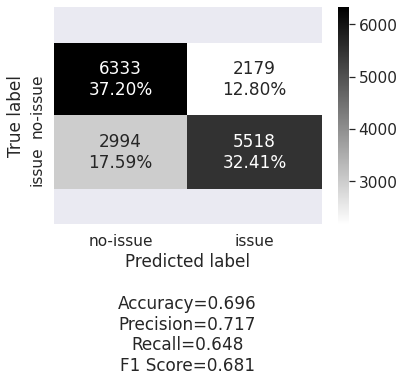

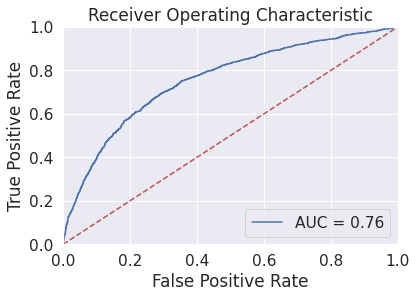

In [39]:
logistic_regression = logistic(X_train_std,X_valid_std,y_train,y_valid)
metrics_fn(logistic_regression,X_train_std,X_valid_std,y_train,y_valid)

validation accuracy :  0.72814180442143
train Accuracy:  0.6814989174764614


<Figure size 1440x1080 with 0 Axes>

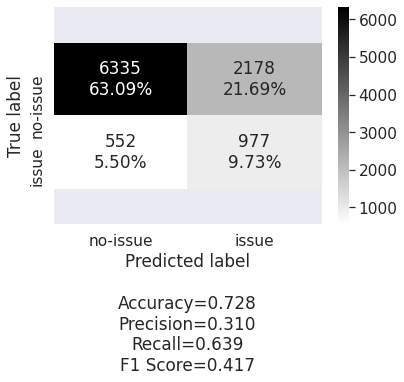

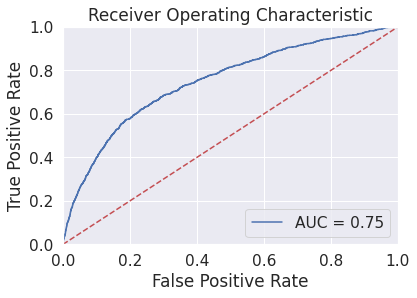

In [40]:
metrics_fn(logistic_regression,X_train_std,X_test_std,y_train,y_test)

In [155]:
# import shap

# # load JS visualization code to notebook
# shap.initjs()

# # train XGBoost model
# X,y = shap.datasets.boston()
# # model = xgboost.train({"learning_rate": 0.01}, xgboost.DMatrix(X, label=y), 100)

# # explain the model's predictions using SHAP
# # (same syntax works for LightGBM, CatBoost, scikit-learn and spark models)
# explainer = shap.TreeExplainer(logistic_regression)
# shap_values = explainer.shap_values(X)

# # visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
# shap.force_plot(explainer.expected_value, shap_values[0,:], X.iloc[0,:])


# Random Forest

validation accuracy :  0.6888888888888889
train Accuracy:  0.6937517511908098


<Figure size 1440x1080 with 0 Axes>

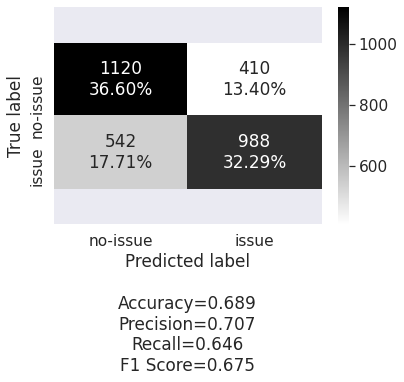

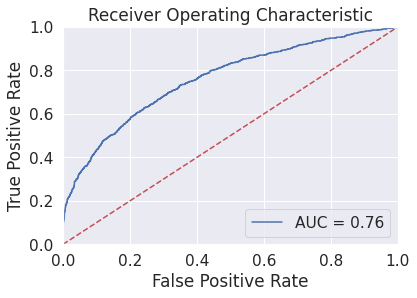

In [215]:
rf_model = random_forest_fn(X_train_std,X_valid_std,y_train,y_valid)

metrics_fn(rf_model,X_train_std,X_valid_std,y_train,y_valid)

validation accuracy :  0.7243576976697869
train Accuracy:  0.6937517511908098


<Figure size 1440x1080 with 0 Axes>

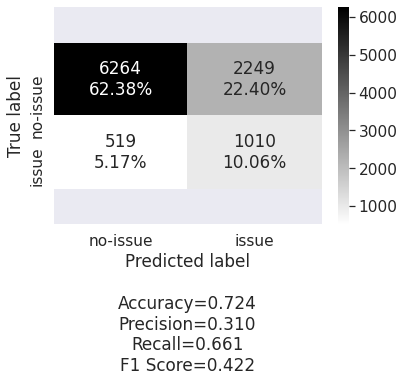

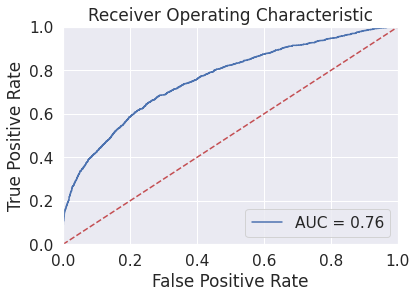

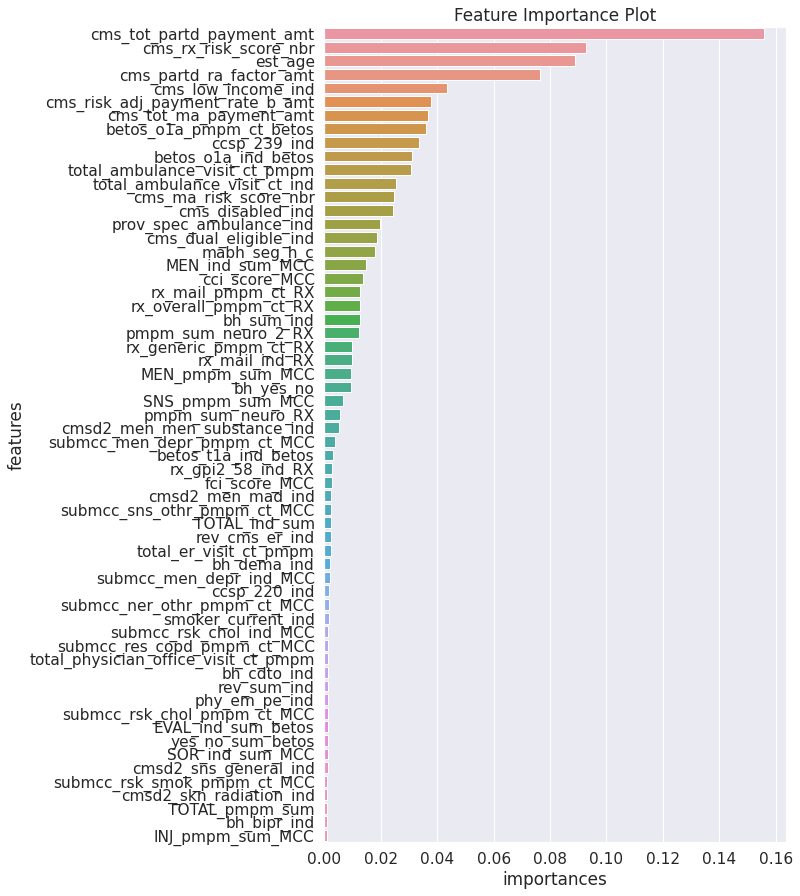

In [216]:
metrics_fn(rf_model,X_train_std,X_test_std,y_train,y_test)

top_features_rf = rf_feature_importance(rf_model,X_train_std)

In [158]:
# top_features_both = list(top_features_rf.features)[0:60]

# top_features_rf.sort_values('features').to_csv("rf_top_features_score.csv")

In [159]:
# rf_importance = pd.read_csv("rf_top_features_score.csv")
# rf_importance = rf_importance.dropna()
# top_features_both = list(rf_importance.features)[0:40]

# Xg_boost_Features

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    3.6s remaining:    5.4s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:    3.9s remaining:    2.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.7s finished


{'colsample_bytree': 0.8, 'gamma': 1.5, 'max_depth': 4, 'min_child_weight': 5, 'subsample': 0.8}
validation accuracy :  0.8467436765584545
train Accuracy:  0.786354721210423


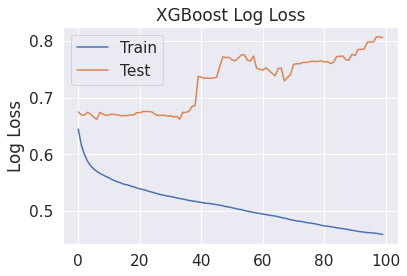

<Figure size 1440x1080 with 0 Axes>

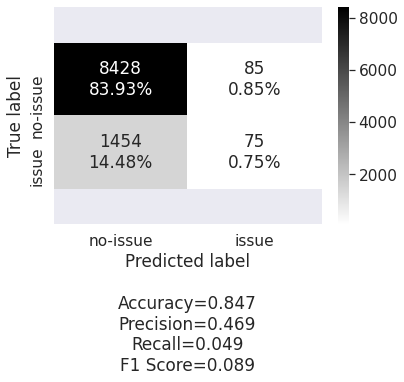

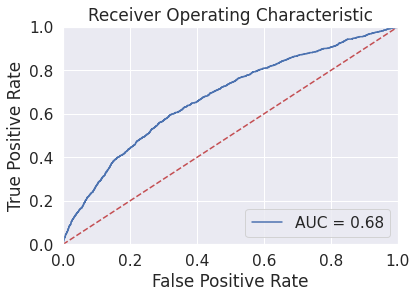

In [160]:
xg_boost_model = xgboost_fn(X_train_std,X_valid_std,y_train,y_valid)
metrics_fn(xg_boost_model,X_train_std,X_test_std,y_train,y_test)

validation accuracy :  0.8467436765584545
train Accuracy:  0.786354721210423


<Figure size 1440x1080 with 0 Axes>

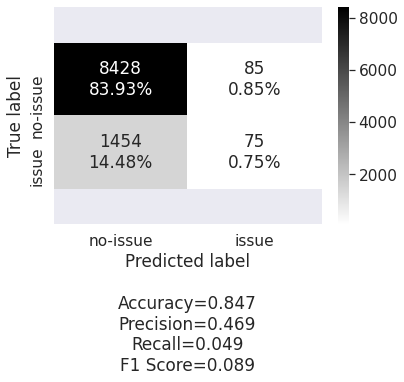

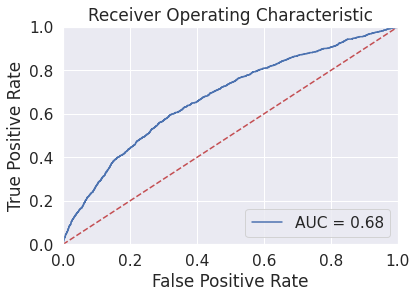

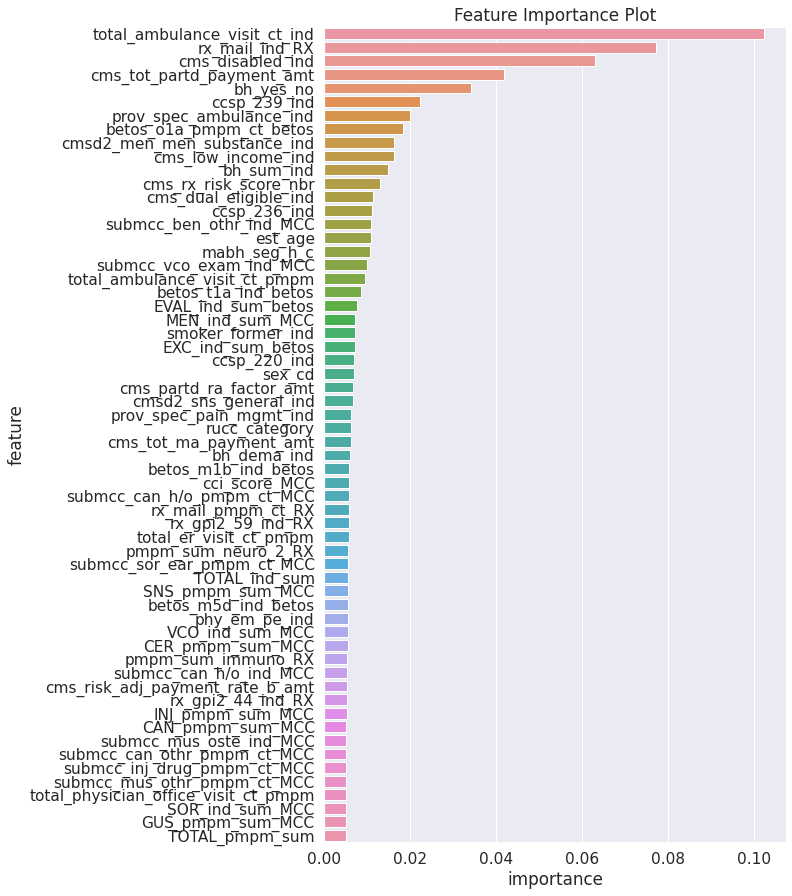

In [161]:
metrics_fn(xg_boost_model,X_train_std,X_test_std,y_train,y_test)

# rf_feature_importance = rf_feature_importance(rf_model,X_train_std)

top_features_xg = feature_importance_fn(xg_boost_model)


In [162]:
# for i in list(top_features_xg.feature)[0:40]:
#     top_features_both.append(i)

# top_features_both = set(top_features_both)

In [163]:
# len(top_features_both)

In [164]:
#!pip install lightgbm

# lightgbm

In [111]:
from sklearn.model_selection import StratifiedKFold
import numpy as np
from lightgbm import LGBMClassifier
import shap
from sklearn.metrics import roc_auc_score
import gc

def kfold_lightgbm(train_df, train_target, test_df, num_folds, stratified=False, debug=False):

    print("Starting LightGBM. Train shape: {}, test shape: {}".format(train_df.shape, test_df.shape))
    # Cross validation model
    folds = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=47)
    train_preds = np.zeros(train_df.shape[0])
    test_preds = np.zeros(test_df.shape[0])
    feat_importance = pd.DataFrame()
    scores = []
    models = []
    explainer = []
    for n_fold, (train_idx, valid_idx) in enumerate(folds.split(train_df, train_target)):
        
        print("--"*0)
        train_x, train_y = train_df.iloc[train_idx], train_target.iloc[train_idx]
        valid_x, valid_y = train_df.iloc[valid_idx], train_target.iloc[valid_idx]

        # LightGBM parameters found by Bayesian optimization
        clf = LGBMClassifier(
            nthread=4,
            boosting_type='gbdt',
            #is_unbalance=True,
            colsample_bytree=0.8,
            n_estimators=90,
            learning_rate=0.02,
            #num_leaves=32,
            subsample=0.7,
            max_depth=8,
            reg_alpha=0.0,
            reg_lambda=1.0,
            #min_split_gain=0.0222415,
            #min_child_weight=40,
            #silent=-1,
            verbose=0,
            #scale_pos_weight=11
            )
        clf.fit(train_x, train_y, eval_set=[(train_x, train_y), (valid_x, valid_y)], 
            eval_metric= 'auc', verbose= 1000, early_stopping_rounds= 300)
        
        

        train_preds[valid_idx] = clf.predict_proba(valid_x, num_iteration=clf.best_iteration_)[:, 1]
        test_preds += clf.predict_proba(test_df, num_iteration=clf.best_iteration_)[:, 1] / folds.n_splits
        
        models.append(clf)
        
    score = roc_auc_score(train_target, train_preds)
    print('Full AUC score %.6f' % score)
    print('Mean AUC score %.6f' % np.mean(scores))
    return models

In [112]:
top_50=['est_age',
 'cms_tot_partd_payment_amt',
 'total_ambulance_visit_ct_pmpm',
 'cms_rx_risk_score_nbr',
 'betos_o1a_pmpm_ct_betos',
 'pmpm_sum_neuro_2_RX',
 'rx_mail_pmpm_ct_RX',
 'cms_low_income_ind',
 'cms_tot_ma_payment_amt',
 'ccsp_239_ind',
 'cms_partd_ra_factor_amt',
 'cms_disabled_ind',
 'cms_ma_risk_score_nbr',
 'bh_sum_ind',
 'total_physician_office_visit_ct_pmpm',
 'cms_risk_adj_payment_rate_b_amt',
 'total_er_visit_ct_pmpm',
 'MEN_pmpm_sum_MCC',
 'EVAL_ind_sum_betos',
 'VCO_ind_sum_MCC',
 'submcc_res_copd_pmpm_ct_MCC',
 'submcc_ben_othr_pmpm_ct_MCC',
 'TOTAL_pmpm_sum',
 'CAN_pmpm_sum_MCC',
 'total_outpatient_visit_ct_pmpm',
 'submcc_sns_othr_pmpm_ct_MCC',
 'rx_generic_pmpm_ct_RX',
 'cms_dual_eligible_ind',
 'cci_score_MCC',
 'submcc_rsk_chol_pmpm_ct_MCC',
 'betos_m5b_pmpm_ct_betos',
 'ccsp_220_ind',
 'CCSP_sum',
 'INJ_pmpm_sum_MCC',
 'SKN_pmpm_sum_MCC',
 'submcc_men_depr_pmpm_ct_MCC',
 'rucc_category',
 'submcc_men_abus_ind_MCC',
 'mabh_seg_h_c',
 'submcc_can_othr_pmpm_ct_MCC',
 'EXC_ind_sum_betos',
 'submcc_inj_drug_pmpm_ct_MCC',
 'pmpm_sum_neuro_RX',
 'cmsd2_men_men_substance_ind',
 'SNS_pmpm_sum_MCC',
 'rx_overall_pmpm_ct_RX',
 'prov_spec_ambulance_ind',
 'betos_m5d_ind_betos',
 'submcc_vco_exam_ind_MCC',
 'submcc_ner_othr_pmpm_ct_MCC']

In [113]:
# X_data = X_data[top_50]
# X_test_std = X_test_std[top_50]

# X_data = X_all[top_50]
# X_test_std = X_test_std[top_50]
# X_

In [114]:
models =kfold_lightgbm(X_data,y_data,X_test_std,num_folds=5)

Starting LightGBM. Train shape: (96468, 138), test shape: (10042, 138)

[LightGBM] [Warning] num_threads is set with nthread=4, will be overridden by n_jobs=-1. Current value: num_threads=-1
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] num_threads is set with nthread=4, will be overridden by n_jobs=-1. Current value: num_threads=-1
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.027063 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] num_threads is set with nthread=4, will be overridden by n_jobs=-1. Current value: num_threads=-1
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
Training until validation scores don

In [115]:
import joblib
# # save model
# joblib.dump(light_gbm_model, 'light_gbm_model.pkl')
# # load model
# light_gbm_model = joblib.load('light_gbm_model.pkl')

In [120]:
# light_gbm_model = models[2]
# joblib.dump(light_gbm_model, 'light_gbm_model_3_138_features_over_sampling.pkl')
# # # load model
# light_gbm_model = joblib.load('light_gbm_model_2_76.pkl')
light_gbm_model = joblib.load('light_gbm_model_3_138_features_over_sampling.pkl')

validation accuracy :  0.7110959074511756
train Accuracy:  0.7110959074511756


<Figure size 1440x1080 with 0 Axes>

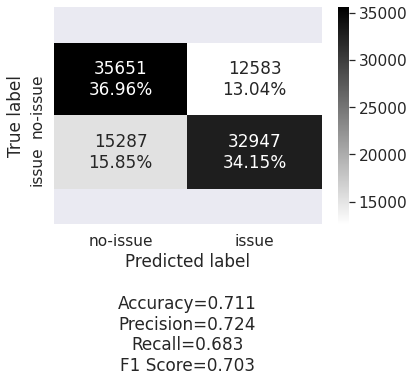

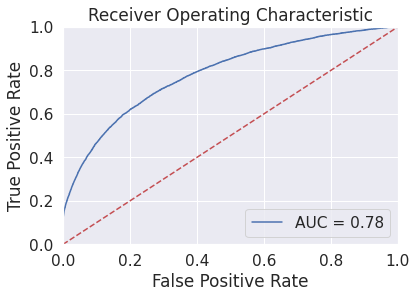

In [121]:
metrics_fn(light_gbm_model,X_data,X_data,y_data,y_data)
# metrics_fn(light_gbm_model,X_data,X_data,y_all,y_all)

validation accuracy :  0.7246564429396535
train Accuracy:  0.7110959074511756


<Figure size 1440x1080 with 0 Axes>

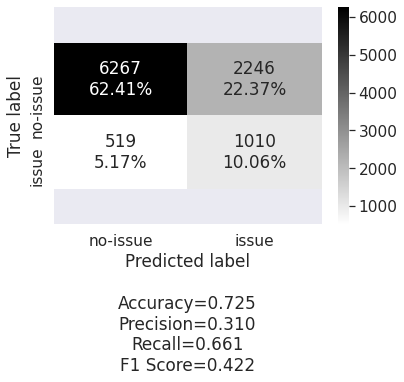

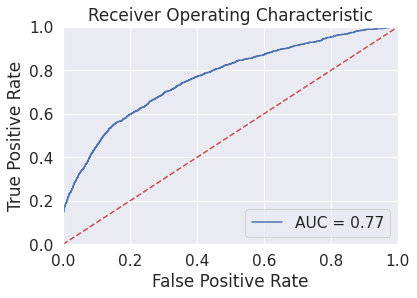

In [122]:
metrics_fn(light_gbm_model,X_data,X_test_std,y_data,y_test)
# metrics_fn(light_gbm_model,X_data,X_test_std,y_all,y_test)

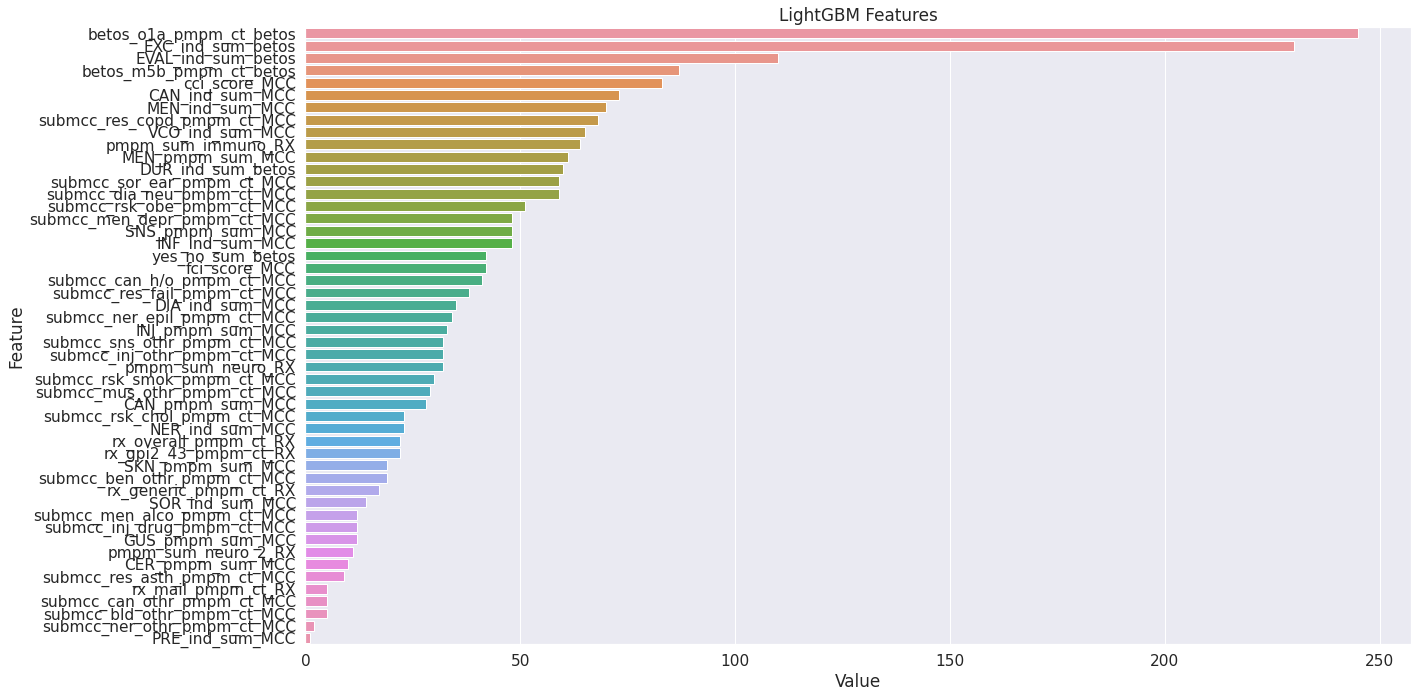

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# sorted(zip(clf.feature_importances_, X.columns), reverse=True)
feature_imp_df = pd.DataFrame(sorted(zip(light_gbm_model.feature_importances_,X_train_std.columns)), columns=['Value','Feature'])
feature_imp_df = feature_imp_df.sort_values(by="Value", ascending=False).head(50)
plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp_df)
plt.title('LightGBM Features')
plt.tight_layout()
plt.show()
#plt.savefig('lgbm_importances-01.png')

In [92]:
# top_50 = list(feature_imp_df.Feature)

In [123]:
import shap
shap.initjs()
explainer = shap.TreeExplainer(light_gbm_model)

In [124]:
# Create SHAP interaction values from 2000 samples from design matrix
X_data_sample = X_data.sample(5000,random_state=42)[light_gbm_model.feature_name_]
shap_interaction_values = explainer.shap_interaction_values(X_data_sample)

## how does prediction I change when feature J is removed from the model

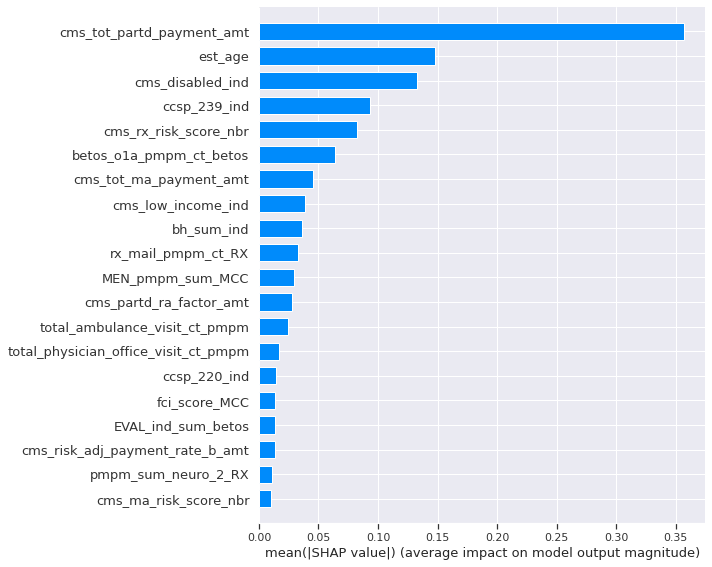

In [128]:
shap_values = explainer.shap_values(X_data_sample)

shap.summary_plot(shap_values[0], X_data_sample,plot_type="bar")


# shap.summary_plot(shap_values, X)

In [134]:
X_data_sample.iloc[[5]]

,betos_o1a_pmpm_ct_betos,EXC_ind_sum_betos,DUR_ind_sum_betos,EVAL_ind_sum_betos,betos_m5b_pmpm_ct_betos,yes_no_sum_betos,MEN_ind_sum_MCC,MEN_pmpm_sum_MCC,submcc_men_depr_pmpm_ct_MCC,CAN_ind_sum_MCC,...,prov_spec_pain_mgmt_ind,phy_em_pe_ind,cms_disabled_ind,cms_low_income_ind,cmsd2_men_men_substance_ind,cmsd2_men_mad_ind,cmsd2_skn_radiation_ind,cmsd2_sns_general_ind,cms_dual_eligible_ind,cmsd2_can_unc_neo
72342,0.0,0,0,2,0.0,3,2,0.25,0.166667,0,...,1,1,1,1,0,1,0,1,1,0


In [126]:
# top_20_shapley = ['cms_tot_partd_payment_amt','est_age','cms_disabled_ind',
# 'ccsp_239_ind','cms_rx_risk_score_nbr','cms_low_income_ind',
# 'betos_o1a_pmpm_ct_betos','MEN_pmpm_sum_MCC','mabh_seg_h_c','cms_partd_ra_factor_amt',
# 'total_ambulance_visit_ct_pmpm','submcc_men_depr_pmpm_ct_MCC','bh_sum_ind','cms_tot_ma_payment_amt',
# 'rx_overall_pmpm_ct_RX','pmpm_sum_neuro_RX','submcc_res_copd_pmpm_ct_MCC']

In [55]:
top_20_shapley = ['cms_tot_partd_payment_amt',
'est_age',
'cms_disabled_ind',
'ccsp_239_ind',
'cms_rx_risk_score_nbr',
'betos_o1a_pmpm_ct_betos',
'cms_tot_ma_payment_amt',
'cms_low_income_ind',
'bh_sum_ind',
'rx_mail_pmpm_ct_RX',
'MEN_pmpm_sum_MCC',
'cms_partd_ra_factor_amt',
'total_ambulance_visit_ct_pmpm',
'total_physician_office_visit_ct_pmpm',
'ccsp_220_ind',
'fci_score_MCC',
'EVAL_ind_sum_betos',
'cms_risk_adj_payment_rate_b_amt',
'pmpm_sum_neuro_2_RX',
'cms_ma_risk_score_nbr']

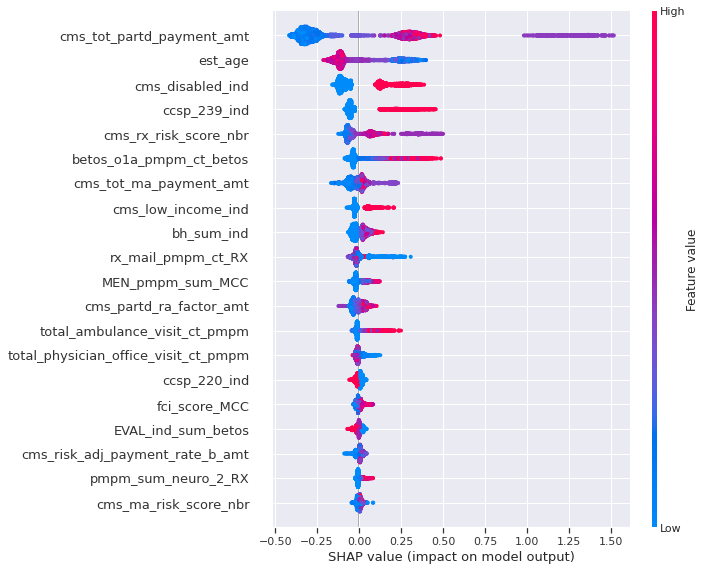

In [56]:
shap.summary_plot(shap_values[1], X_data_sample,plot_type='dot')

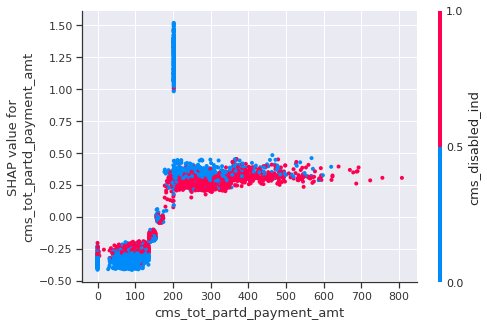

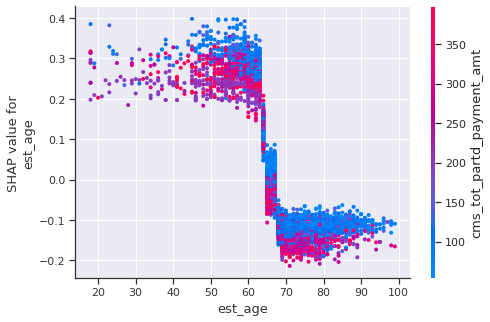

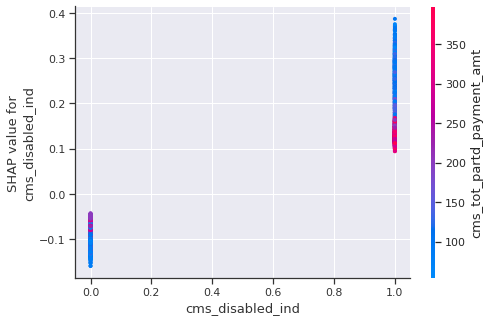

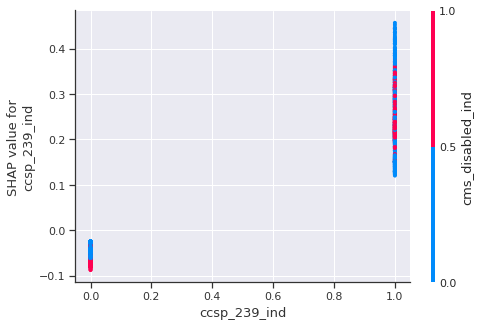

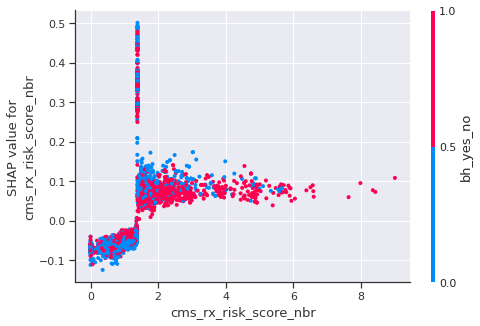

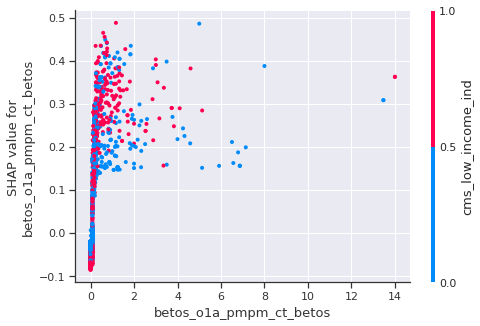

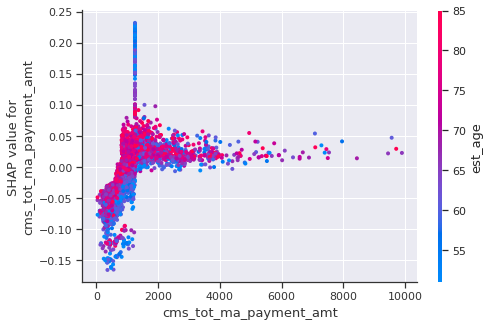

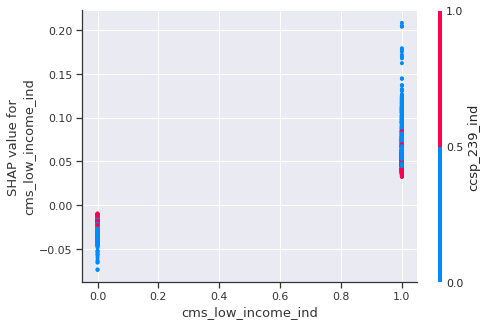

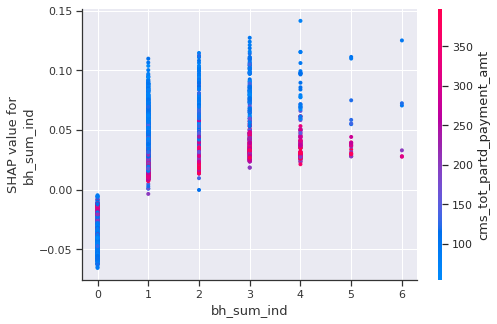

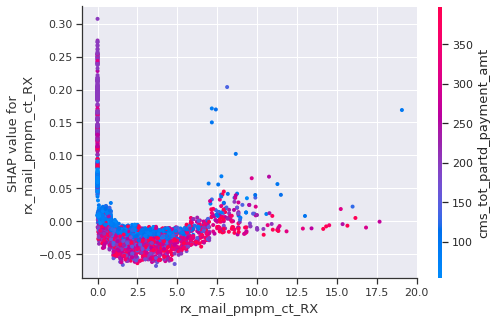

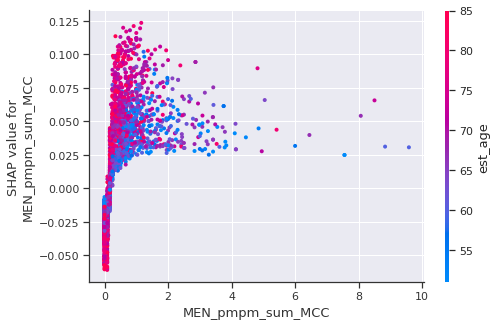

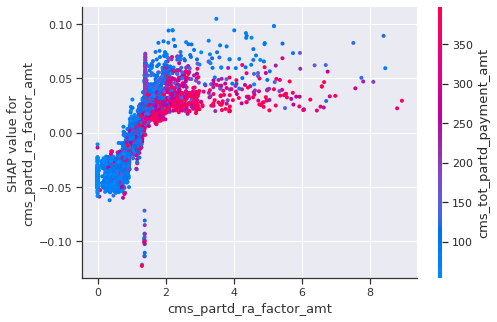

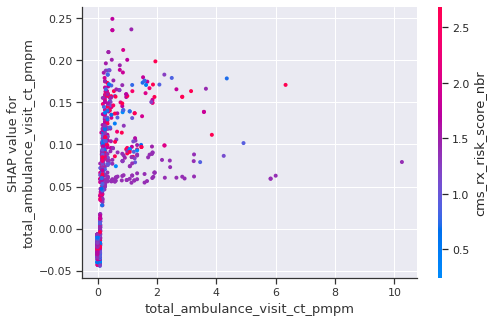

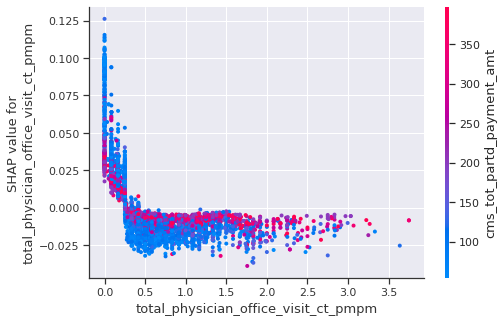

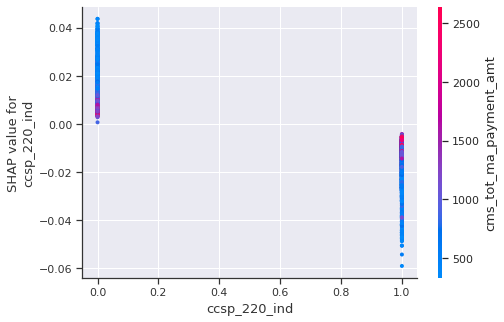

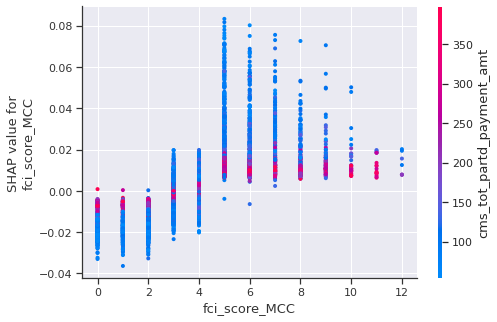

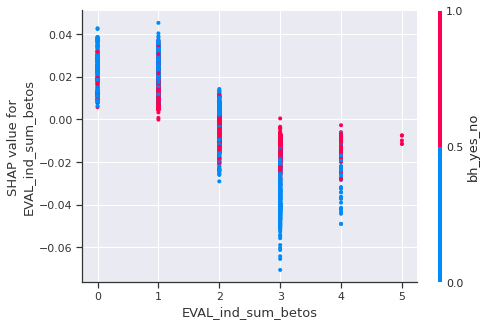

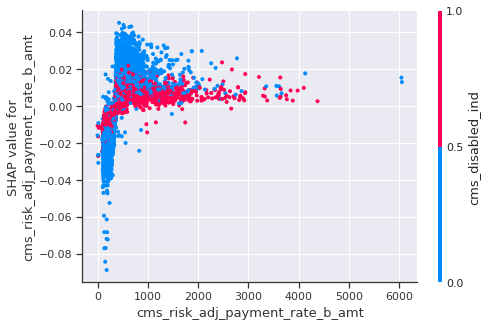

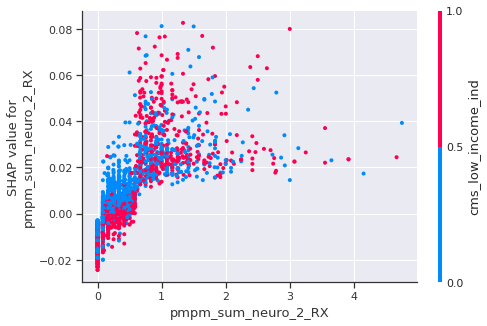

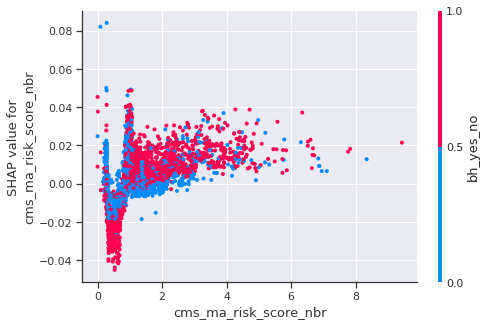

In [57]:
for feature in top_20_shapley:
    shap.dependence_plot(feature,shap_values[1], X_data_sample)

In [247]:
X_data_sample.est_age.describe()

count    5000.00000
mean       69.10360
std        11.05637
min        18.00000
25%        64.00000
50%        70.00000
75%        76.00000
max        99.00000
Name: est_age, dtype: float64

In [248]:
df.est_age.describe()

count    69572.000000
mean        70.815673
std         10.417384
min         18.000000
25%         66.000000
50%         71.000000
75%         77.000000
max        101.000000
Name: est_age, dtype: float64

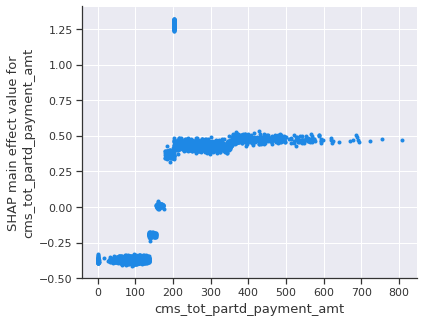

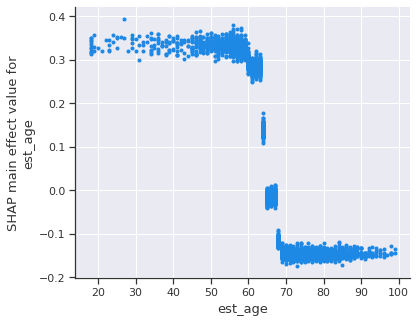

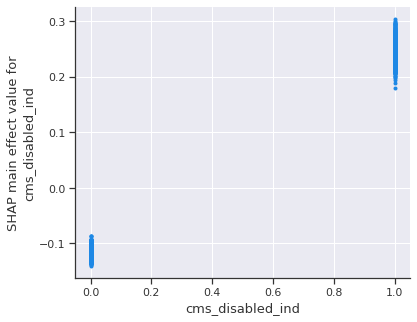

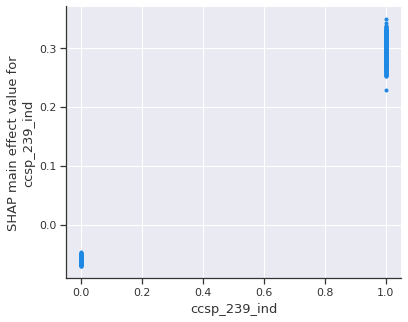

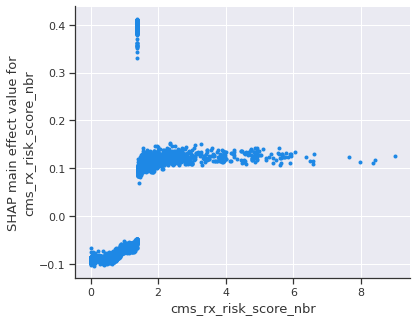

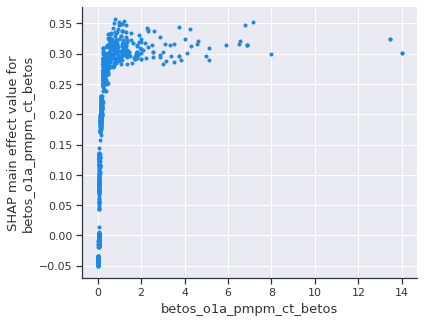

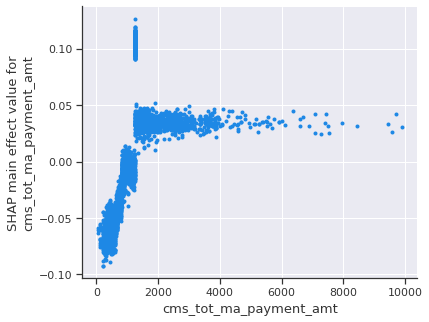

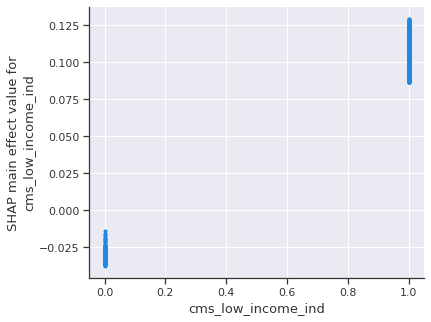

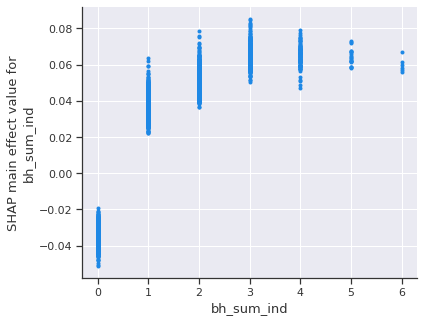

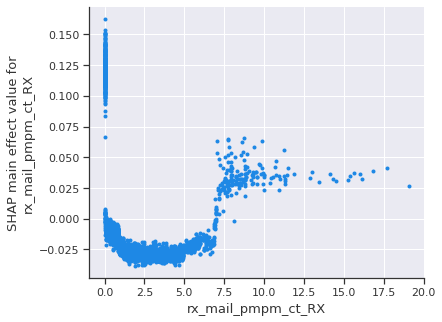

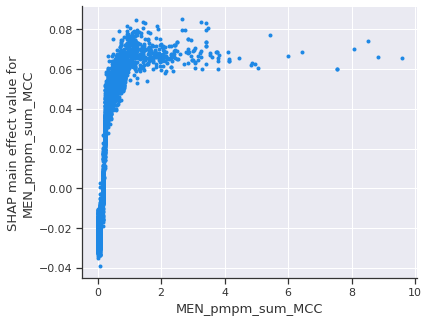

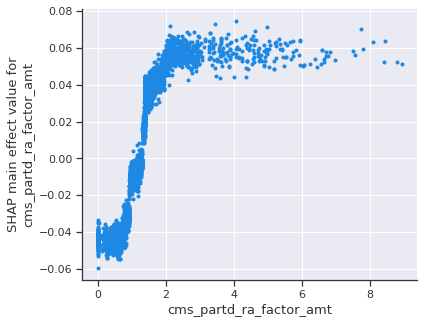

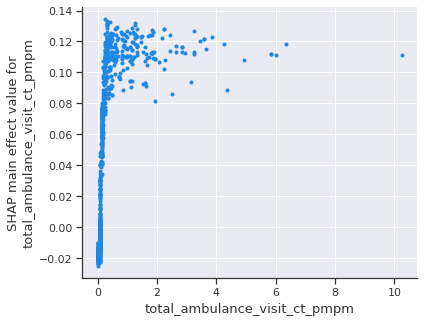

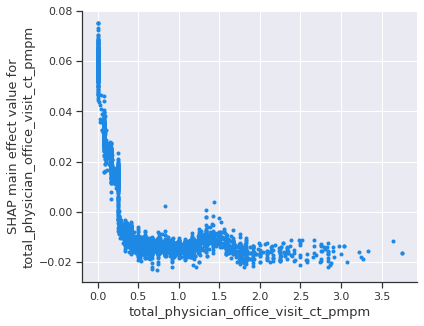

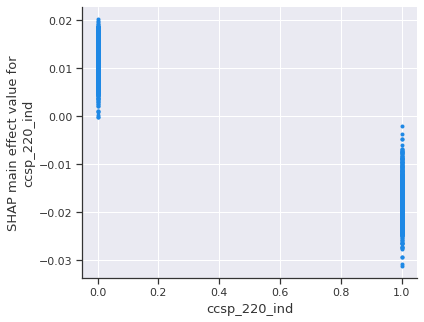

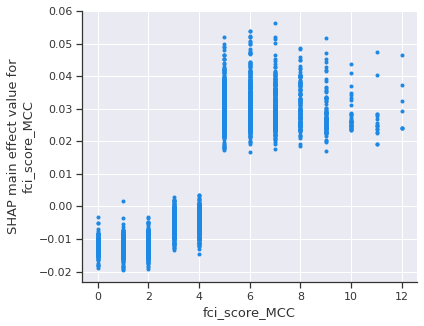

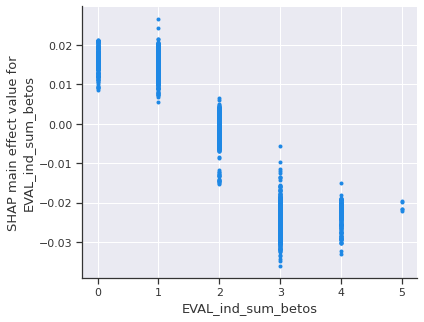

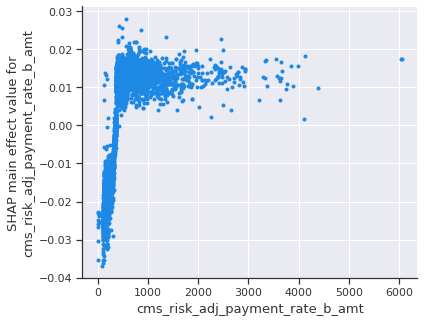

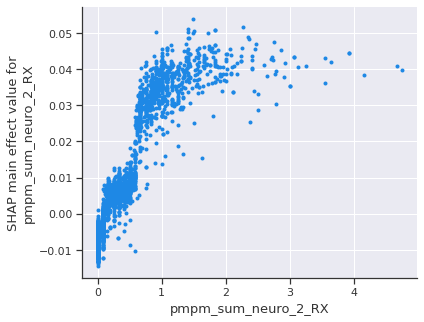

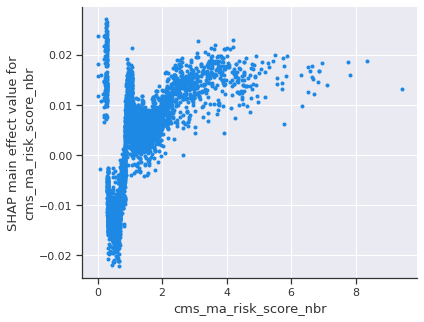

In [58]:
for feature in top_20_shapley:
    shap.dependence_plot(
     (feature, feature),
     shap_interaction_values, X_data_sample,interaction_index=None,show=False)

In [59]:
X_data.cms_tot_partd_payment_amt.describe()

count    96468.000000
mean       168.552214
std        117.135038
min          0.000000
25%         86.940000
50%        115.220000
75%        239.670000
max        857.910000
Name: cms_tot_partd_payment_amt, dtype: float64

In [ ]:
fci_score
mental
total_physician
cms_risk_Adj_payment_rate_b_amt / disability_ind

In [ ]:
# explainer.append(shap.TreeExplainer(clf))
# fold_importance_df["shap_values"] = abs(shap.TreeExplainer(clf).shap_values(valid_x)[:][test_df.shape[1]]).mean(axis=0).T

# # # Display/plot shapley values
# # def display_shapley_values(feat_importance):
# #     best_features = feat_importance[["feature", "shap_values"]].groupby("feature")["shap_values"].agg(['mean', 'std']) \
# #                                                                .sort_values(by="mean", ascending=False).head(40).reset_index()
# #     best_features.columns = ["feature", "mean shapley values", "err"]
# #     plt.figure(figsize=(8, 10))
# #     sns.barplot(x="mean shapley values", y="feature", xerr=best_features['err'], data=best_features)
# #     plt.title('LightGBM shapley values (avg over folds)')
# #     plt.tight_layout()
# #     plt.show()

# display_shapley_values(feature_imp_df)

In [79]:

# # Display/plot feature importance
# def display_importances(feat_importance):
#     best_features = feat_importance[["feature", "importance"]].groupby("feature")["importance"].agg(['mean', 'std']) \
#                                                               .sort_values(by="mean", ascending=False).head(40).reset_index()
#     best_features.columns = ["feature", "mean importance", "err"]
#     plt.figure(figsize=(8, 10))
#     sns.barplot(x="mean importance", y="feature", xerr=best_features['err'], data=best_features)
#     plt.title('LightGBM Features (avg over folds)')
#     plt.tight_layout()
#     plt.show()


In [91]:
df_betos_mcc_test = pd.merge(df_betos_test, df_mcc_test, left_on='person_id_syn_betos', right_on='person_id_syn_MCC', how='left')
df_betos_mcc_test = df_betos_mcc_test.drop('person_id_syn_MCC',axis=1)



df_betos_mcc_rx_test = pd.merge(df_betos_mcc_test, df_rx_neti_test, left_on='person_id_syn_betos', right_on='person_id_syn_RX', how='left')
# df_betos_mcc_rx_y = df_betos_mcc_y.join(df_rx_neti, lsuffix='person_id_syn_betos', rsuffix= 'person_id_syn_RX')
df_betos_mcc_rx_test = df_betos_mcc_rx_test.drop('person_id_syn_RX',axis=1)

df_betos_mcc_rx_demo_test= pd.merge(df_betos_mcc_rx_test, df_demographics_test, left_on='person_id_syn_betos', right_on='person_id_syn_demo', how='left')
# df_betos_mcc_rx_demo_y = df_betos_mcc_rx_y.join(df_demographics, lsuffix='person_id_syn_betos', rsuffix='person_id_syn')
df_betos_mcc_rx_demo_test = df_betos_mcc_rx_demo_test.drop('person_id_syn_demo',axis=1)


df_betos_mcc_rx_demo_rev_test = pd.merge(df_betos_mcc_rx_demo_test, df_rev_test, left_on='person_id_syn_betos', right_on='person_id_syn_rev', how='left')
# df_betos_mcc_rx_demo_rev_y = df_betos_mcc_rx_demo_y.join(df_rev, lsuffix='person_id_syn_betos', rsuffix='person_id_syn_rev')
df_betos_mcc_rx_demo_rev_test = df_betos_mcc_rx_demo_rev_test.drop('person_id_syn_rev',axis=1)

df_betos_mcc_rx_demo_rev_cms_test = pd.merge(df_betos_mcc_rx_demo_rev_test, df_cms_test, left_on='person_id_syn_betos', right_on='person_id_syn_cms', how='left')
# df_betos_mcc_rx_demo_rev_cms_y = df_betos_mcc_rx_demo_rev_y.join(df_cms, lsuffix='person_id_syn_betos', rsuffix='person_id_syn_cms')
df_betos_mcc_rx_demo_rev_cms_test = df_betos_mcc_rx_demo_rev_cms_test.drop('person_id_syn_cms',axis=1)



In [92]:
df_betos_mcc_rx_demo_rev_cms_test.shape

(17681, 139)

In [93]:
# df_betos_mcc_rx_demo_rev_cms_test.to_csv("test_real_h20_4.csv",index=False)

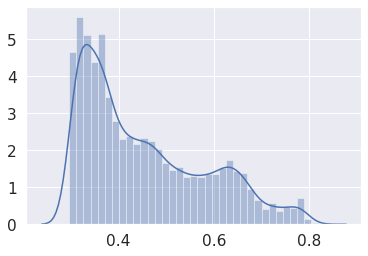

In [102]:
X_test_real_num_min_max = min_max_scaler_fitted.transform(df_betos_mcc_rx_demo_rev_cms_test[numerical_columns])
X_test_real_num_min_max = pd.DataFrame(X_test_real_num_min_max,columns=df_betos_mcc_rx_demo_rev_cms_test[numerical_columns].columns)

X_test_real_encoded_category = MultiColumnLabelEncoder().transform(df_betos_mcc_rx_demo_rev_cms_test[categorical_columns])

X_test_real = pd.concat([X_test_real_num_min_max, X_test_real_encoded_category],axis=1)

prediction = light_gbm_model.predict_proba(X_test_real)
submission_df = pd.DataFrame({'ID':df_betos_mcc_rx_demo_rev_cms_test.person_id_syn_betos,'SCORE':prediction[:,1]})
submission_df.reset_index(drop=True,inplace=True)
submission_df['RANK'] = submission_df.SCORE.rank(ascending=False)
submission_df['RANK'] = submission_df.RANK.astype(int)

submission_df = submission_df.sort_values('RANK',ascending=True)
submission_df.reset_index(drop=True,inplace=True)
sns.distplot(prediction[:,1])
submission_df.to_csv("CaseCompetition_Neti_Sheth.csv",index=False)

In [74]:
submission_df.RANK.max()

17680

In [82]:
# submission_df.sort_values("SCORE",ascending=False,inplace=True)

# submission_df.reset_index(inplace=True)
# submission_df.columns=['RANK','ID','SCORE']

In [84]:
submission_df.SCORE.rank(ascending=False)

0            1.0
1            2.0
2            3.0
3            4.0
4            5.0
          ...   
17676    17677.0
17677    17678.0
17678    17679.0
17679    17680.5
17680    17680.5
Name: SCORE, Length: 17681, dtype: float64

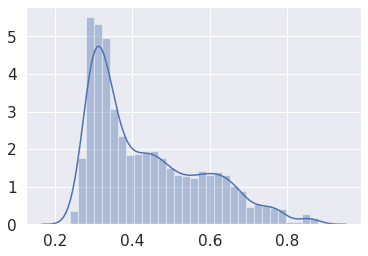

In [70]:
prediction = light_gbm_model.predict_proba(X_test_std)

sns.distplot(prediction[:,1])

In [91]:
X_y_data.columns

Index(['betos_o1a_pmpm_ct_betos', 'EXC_ind_sum_betos', 'DUR_ind_sum_betos',
       'EVAL_ind_sum_betos', 'betos_m5b_pmpm_ct_betos', 'yes_no_sum_betos',
       'MEN_ind_sum_MCC', 'MEN_pmpm_sum_MCC', 'submcc_men_depr_pmpm_ct_MCC',
       'CAN_ind_sum_MCC',
       ...
       'phy_em_pe_ind', 'cms_disabled_ind', 'cms_low_income_ind',
       'cmsd2_men_men_substance_ind', 'cmsd2_men_mad_ind',
       'cmsd2_skn_radiation_ind', 'cmsd2_sns_general_ind',
       'cms_dual_eligible_ind', 'cmsd2_can_unc_neo', 'transportation_issues'],
      dtype='object', length=139)

In [ ]:
X_data

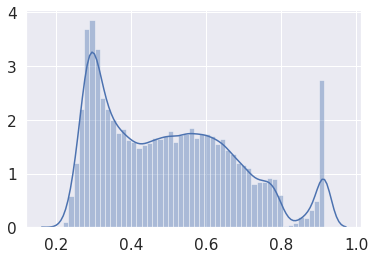

In [68]:
prediction=light_gbm_model.predict_proba(X_data)



# submission_df = pd.DataFrame({'ID':df_betos_mcc_rx_demo_rev_cms_test.person_id_syn_betos,'SCORE':prediction[:,1]})
# submission_df['RANK'] = submission_df.SCORE.rank(ascending=False)

# submission_df = submission_df.sort_values('RANK',ascending=True)
# submission_df.to_csv("submission_10081740.csv",index=False)

sns.distplot(prediction[:,1])

In [ ]:
# prediction=ligh.predict_proba(X_test_real)



# submission_df = pd.DataFrame({'ID':df_betos_mcc_rx_demo_rev_cms_test.person_id_syn_betos,'SCORE':prediction[:,1]})
# submission_df['RANK'] = submission_df.SCORE.rank(ascending=False)

# submission_df = submission_df.sort_values('RANK',ascending=True)
# # submission_df.to_csv("submission_10081740.csv",index=False)

In [ ]:
len(prediction)

In [ ]:
df_betos_mcc_rx_demo_rev_cms_test.shape

In [ ]:
plt.figure(figsize=(15,7))
plt.hist(prediction[y_test==0], bins=50, label='Negatives',density=True)
plt.hist(prediction[y_test==1], bins=50, label='Positives', alpha=0.7, color=('r','b'),density=True)
# sns.distplot(subset['arr_delay'], hist = False, kde = True,
#                  kde_kws = {'shade': True, 'linewidth': 3}, 
#                   label = airline)

plt.xlabel('Probability of being Positive Class', fontsize=25)
plt.ylabel('Number of records in each bucket', fontsize=25)
plt.legend(fontsize=15)
plt.tick_params(axis='both', labelsize=25, pad=5)
plt.show()

In [ ]:
import h2o
h2o.init()


from h2o.automl import H2OAutoML

y_train = y_train.map({0:'no',1:'yes'})
y_valid = y_valid.map({0:'no',1:'yes'})
y_test = y_test.map({0:'no',1:'yes'})

X_train_h2o = pd.concat([X_train,y_train],axis=1)
X_valid_h2o = pd.concat([X_valid,y_valid],axis=1)
X_test_h2o = pd.concat([X_test,y_test],axis=1)

X_train_hf = h2o.H2OFrame(X_train_h2o)
X_valid_hf = h2o.H2OFrame(X_valid_h2o)
X_test_hf = h2o.H2OFrame(X_test_h2o)



In [ ]:
y = "transportation_issues"
x = list(X_train_h2o.drop(columns=['transportation_issues'],axis=1).columns)

aml = H2OAutoML(max_models = 10, seed = 10, exclude_algos = ["StackedEnsemble", "DeepLearning"], verbosity="info", nfolds=0)

aml.train(x = x, y = y, training_frame = X_train_hf, validation_frame=X_valid_hf)

lb = aml.leaderboard
lb.head()



In [ ]:
y_test_pred=aml.leader.predict(X_test_hf)

aml.leader.model_performance(X_test_hf)

In [ ]:
y_valid_pred=aml.leader.predict(X_valid_hf)

aml.leader.model_performance(X_valid_hf)

In [ ]:
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

In [ ]:
glm_model = H2OGeneralizedLinearEstimator(family= "binomial",
                                          lambda_ = 0,lea compute_p_values = True)

In [ ]:


# top_features = ['betos_o1a_ind_betos',
#  'est_age',
#  'betos_o1a_pmpm_ct_betos',
#  'ccsp_239_ind',
#  'rx_mail_ind_RX',
#  'MEN_ind_perc_MCC',
#  'ccsp_220_ind',
#  'pmpm_sum_neuro_2_RX',
#  'smoker_current_ind',
#  'rx_gpi2_59_ind_RX',
#  'EXC_ind_sum_betos',
#  'rx_overall_pmpm_ct_RX',
#  'otherss_ind_perc_RX',
#  'rx_gpi2_17_ind_RX',
#  'rx_gpi2_43_ind_RX',
#  'EVAL_ind_perc_betos',
#  'BEN___MCC',
#  'sex_cd',
#  'betos_m5d_ind_betos',
#  'otherss_pmpm_ind_perc_RX',
#  'TEST_ind_perc_betos',
#  'rx_generic_pmpm_ct_RX',
#  'betos_o1b_ind_betos',
#  'rx_gpi2_72_pmpm_ct_RX',
#  'rx_gpi2_22_ind_RX',
#  'ccsp_163_ind',
#  'ccsp_228_ind']


# X_train = X_train[top_features]
# X_test = X_test[top_features]

In [ ]:
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred_test=logistic_regression.predict(X_test)
y_pred_train=logistic_regression.predict(X_train)

print('Accuracy: ',metrics.accuracy_score(y_test, y_pred_test))
print('Accuracy: ',metrics.accuracy_score(y_train, y_pred_train))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
RF_clf = RandomForestClassifier(n_estimators=300,max_depth=6)
RF_clf.fit(X_train, y_train)

y_rf_pred_test = RF_clf.predict(X_test)
y_rf_pred_train = RF_clf.predict(X_train)

# print(classification_report(y_test, y_rf_pred_test))
# print(classification_report(y_train, y_rf_pred_train))

print(metrics.accuracy_score(y_test, y_rf_pred_test))
# print(classification_report(y_test, y_rf_pred_test))

print(metrics.accuracy_score(y_train, y_rf_pred_train))

print('Accuracy: ',metrics.accuracy_score(y_test, y_rf_pred_test))
print('Accuracy: ',metrics.accuracy_score(y_train, y_rf_pred_train))

import seaborn as sns
from sklearn.metrics import confusion_matrix,accuracy_score
# cf_matrix = confusion_matrix(y_test, y_pred_test)
# print(cf_matrix)


#from cf.matrix import cf_ 
import cf_matrix
from cf_matrix import make_confusion_matrix
#print('test',classification_report(y_test, y_pred_test))
cm = confusion_matrix(y_test, y_rf_pred_test)
plt.figure(figsize=(20,15))
sns.set(font_scale=1.4) # for label size
make_confusion_matrix(cm, group_names=['no- issue','issue'],categories=['no-issue','issue'], cmap='binary')
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) 
plt.show()

import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = RF_clf.predict_proba(X_test)
preds = probs[:,1]
# preds = [1]*17119
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
y_valid.value_counts()

In [ ]:
8906/(8906+1530)

In [ ]:
top_featured_columns

In [ ]:
y_rf_pred_test = RF_clf.predict(X_valid)
y_rf_pred_train = RF_clf.predict(X_train)

# print(classification_report(y_test, y_rf_pred_test))
# print(classification_report(y_train, y_rf_pred_train))

print(metrics.accuracy_score(y_valid, y_rf_pred_test))
# print(classification_report(y_test, y_rf_pred_test))

print(metrics.accuracy_score(y_train, y_rf_pred_train))

print('Accuracy: ',metrics.accuracy_score(y_valid, y_rf_pred_test))
print('Accuracy: ',metrics.accuracy_score(y_train, y_rf_pred_train))

import seaborn as sns
from sklearn.metrics import confusion_matrix,accuracy_score
# cf_matrix = confusion_matrix(y_test, y_pred_test)
# print(cf_matrix)


#from cf.matrix import cf_ 
import cf_matrix
from cf_matrix import make_confusion_matrix
#print('test',classification_report(y_test, y_pred_test))
cm = confusion_matrix(y_valid, y_rf_pred_test)
plt.figure(figsize=(20,15))
sns.set(font_scale=1.4) # for label size
make_confusion_matrix(cm, group_names=['no- issue','issue'],categories=['no-issue','issue'], cmap='binary')
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) 
plt.show()

import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = RF_clf.predict_proba(X_valid)
preds = probs[:,1]
# preds = [1]*17119
fpr, tpr, threshold = metrics.roc_curve(y_valid, preds)
roc_auc = metrics.auc(fpr, tpr)
# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
# # Hyperparameter tuning grid
# params = {'min_child_weight': [1, 5, 10],
#         'gamma': [0.5, 1, 1.5, 2, 5],
#         'subsample': [0.6, 0.8, 1.0],
#         'colsample_bytree': [0.6, 0.8, 1.0],
#         'max_depth': [3, 4, 5]}

# Hyperparameter tuning grid
params = {'min_child_weight': [5],
        'gamma': [1.5],
        'subsample': [0.8],
        'colsample_bytree': [0.8],
        'max_depth': [4]}

In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost.sklearn import XGBClassifier
# Initialize XGBoost model, use growth tree algorithm similar to lightgbm
bst = XGBClassifier(n_jobs=-1,grow_policy='lossguide',tree_method ='hist',n_estimators=500)
# Gridsearch on parameter grid, use AUC to determine the best model
cv = GridSearchCV(bst,params,'roc_auc',-1, verbose=10)
# Fit model on the training data, track logloss on training and testing set
cv.fit(X_train, y_train,eval_metric='logloss',eval_set=[(X_train,y_train),(X_test,y_test)],verbose=False)

y_xg_pred_test = cv.best_estimator_.predict(X_test)
y_xg_pred_train = cv.best_estimator_.predict(X_train)

print(metrics.accuracy_score(y_test, y_xg_pred_test))
print(metrics.accuracy_score(y_train, y_xg_pred_train))


cm = confusion_matrix(y_test, y_xg_pred_test)
plt.figure(figsize=(20,15))
sns.set(font_scale=1.4) # for label size
make_confusion_matrix(cm, group_names=['no- issue','issue'],categories=['no-issue','issue'], cmap='binary')
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) 
plt.show()

import joblib

# Print out the best parameters
cv.best_params_

#save model
joblib.dump(cv.best_estimator_, 'xgb.model')


#load saved model
xgb = joblib.load('xgb.model')


import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = xgb.predict_proba(X_test)
preds = probs[:,1]
# preds = [1]*17119
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# retrieve performance metrics
results = xgb.evals_result()
epochs = len(results['validation_0']['logloss'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss');


# Feature importance plot
feature_importance = pd.DataFrame({'feature':xgb.get_booster().feature_names, 'importance':xgb.feature_importances_}).sort_values('importance',ascending=False).reset_index().drop(columns='index')
fig, ax = plt.subplots()
fig.set_size_inches(8.27,15)
plt.title('Feature Importance Plot')
sns.barplot(x='importance',y='feature',ax=ax,data=feature_importance[:50])

In [ ]:
feature_importance

In [ ]:
top_featured_columns = list(feature_importance.feature[0:20])
top_featured_columns

In [ ]:
# # Create SHAP tree explainer
# import shap
# shap.initjs()
# explainer = shap.TreeExplainer(xgb.get_booster())

# # Create SHAP interaction values from 2000 samples from design matrix
# design_matrix_sample = df_model_sample.sample(2000,random_state=42)[xgb.get_booster().feature_names]
# shap_interaction_values = explainer.shap_interaction_values(design_matrix_sample)

# # Plot SHAP dependence plot for top 30 features
# for feature in feature_importance.head(30).feature.to_list():
#     shap.dependence_plot(
#      (feature, feature),
#      shap_interaction_values, design_matrix_sample,interaction_index=None,show=False)

# H2O

In [ ]:
churn_df = h2o.import_file('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [ ]:
churn_df.describe()

In [ ]:
import h2o
h2o.init()


from h2o.automl import H2OAutoML

y_train = y_train.map({0:'no',1:'yes'})
y_test = y_test.map({0:'no',1:'yes'})
y_valid = y_valid.map({0:'no',1:'yes'})

X_train_h2o = pd.concat([X_train,y_train],axis=1)
X_test_h2o = pd.concat([X_test,y_test],axis=1)
X_valid_h2o = pd.concat([X_valid,y_valid],axis=1)

X_train_hf = h2o.H2OFrame(X_train_h2o)
X_test_hf = h2o.H2OFrame(X_test_h2o)
X_valid_hf = h2o.H2OFrame(X_valid_h2o)


y = "transportation_issues"
x = list(df_model_sample.drop(columns=['transportation_issues','person_id_syn_betos']).columns)


In [ ]:
aml = H2OAutoML(max_models = 10, seed = 10, exclude_algos = ["StackedEnsemble", "DeepLearning"], verbosity="info", nfolds=0)

aml.train(x = x, y = y, training_frame = X_train_hf, validation_frame=X_test_hf)

lb = aml.leaderboard
lb.head()

y_test_pred=aml.leader.predict(X_test_hf)

aml.leader.model_performance(X_test_hf)

In [ ]:
y_valid_pred=aml.leader.predict(X_valid_hf)

aml.leader.model_performance(X_valid_hf)

In [ ]:

model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])

In [ ]:
h2o.get_model([mid for mid in model_ids if "XGBoost" in mid][0])

In [ ]:
out = h2o.get_model([mid for mid in model_ids if "XGBoost" in mid][0])

In [ ]:
out.params

In [ ]:
out.convert_H2OXGBoostParams_2_XGBoostParams()

In [ ]:
out_gbm = h2o.get_model([mid for mid in model_ids if "GBM" in mid][0])

In [ ]:
out.confusion_matrix()

In [ ]:
out.varimp_plot()

In [ ]:
aml.leader.download_mojo(path = "./")